In [6]:

import geopandas as gpd

from gelos.config import PROJ_ROOT, PROCESSED_DATA_DIR, DATA_VERSION, RAW_DATA_DIR
from gelos.config import REPORTS_DIR, FIGURES_DIR
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
data_root = RAW_DATA_DIR / DATA_VERSION
chip_gdf = gpd.read_file(data_root / 'gelos_chip_tracker.geojson')
figures_dir = FIGURES_DIR / DATA_VERSION
figures_dir.mkdir(exist_ok=True, parents=True)

In [13]:
category_colors = {
    "Water": "#419bdf",
    "Trees": "#397d49",
    "Crops": "#e49635",
    "Built area": "#c4281b",
    "Bare Ground": "#a59b8f",
    "Rangeland": "#e3e2c3",
}

In [18]:
len(chip_gdf)

60507

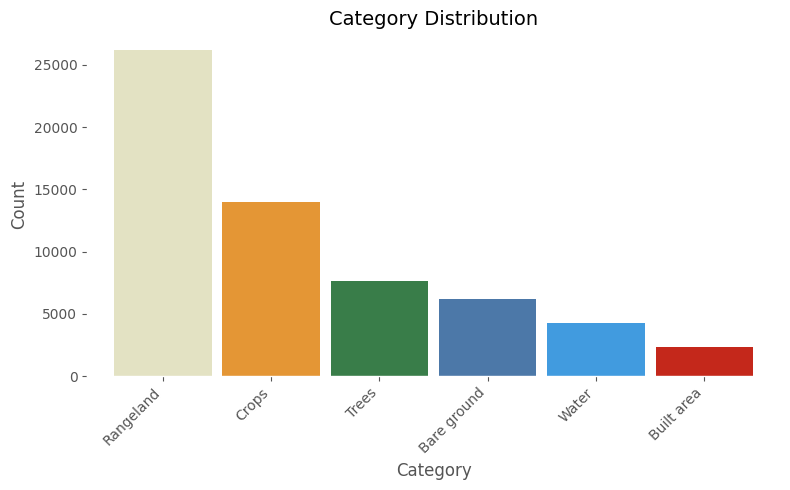

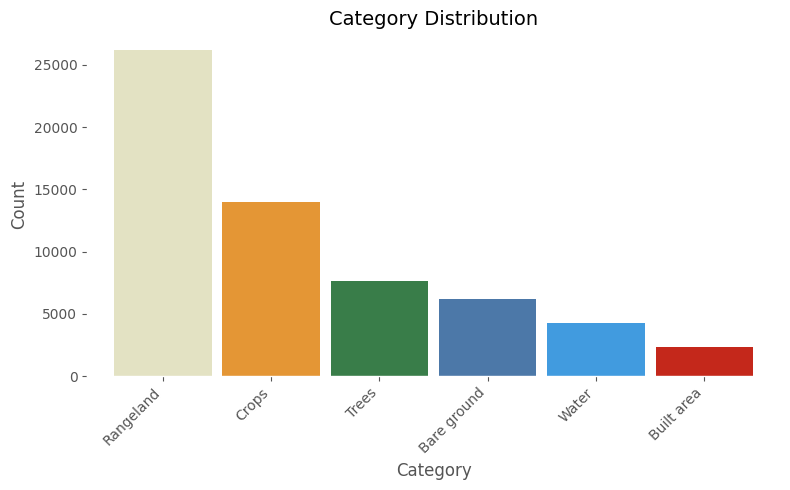

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
counts = chip_gdf['category'].value_counts()
colors = [category_colors.get(cat, "#4C78A8") for cat in counts.index]
counts.plot(kind='bar', ax=ax, color=colors, width=0.9)
ax.set_title('Category Distribution', fontsize=14)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
fig